In [1]:
import tensorflow as tf 
from keras.utils import np_utils 
from matplotlib import pyplot as plt
import numpy as np
import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
print('Training Images: {}'.format(x_train.shape))
print('Testing Images: {}'.format(x_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [4]:
print(x_train[0].shape)

(32, 32, 3)


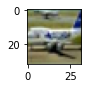

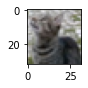

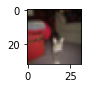

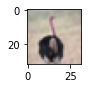

In [5]:
for i in range(332, 336):
    plt.subplots(figsize = (1,1))
    img = x_train[i]
    plt.imshow(img)
    plt.show

In [6]:
x_train = x_train.reshape(x_train.shape[0],32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
n_classes = 10

print("Shape before one-hot encoding : ",y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding : ", y_train.shape)


Shape before one-hot encoding :  (50000, 1)
Shape after one-hot encoding :  (50000, 10)


In [7]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
#convolutional layers
model.add(Conv2D (50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add (MaxPool2D(pool_size=(2,2)))
model.add (Dropout (0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')) 
model.add(MaxPool2D (pool_size=(2,2)))
model.add (Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add (Dropout (0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout (0.3))

# output layer
model.add(Dense(10, activation='softmax'))

# compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test ))

Epoch 1/2
391/391 [==============================] - 278s 709ms/step - loss: 1.5452 - accuracy: 0.4335 - val_loss: 1.0876 - val_accuracy: 0.6111
Epoch 2/2
391/391 [==============================] - 259s 662ms/step - loss: 1.0621 - accuracy: 0.6226 - val_loss: 0.8893 - val_accuracy: 0.6851


In [8]:
classes = range(0, 10)
names =['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

class_labels = dict (zip(classes, names))

batch = x_test[100:109]
labels = np.argmax (y_test[100:109], axis=-1)

# make predictions 
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 109ms/step


In [9]:
print(predictions)

[[2.97451974e-03 3.84627056e-04 6.57943562e-02 7.61663467e-02
  4.96537566e-01 1.11006506e-01 7.13272579e-03 2.37157166e-01
  1.80058100e-03 1.04557152e-03]
 [5.06534008e-03 2.16563419e-03 7.56000131e-02 1.50772959e-01
  1.74918950e-01 2.98074633e-01 3.66104022e-02 2.46778905e-01
  4.93791606e-03 5.07519022e-03]
 [5.19133965e-03 1.49629610e-02 1.01995870e-01 1.66256994e-01
  1.43375210e-02 8.11775178e-02 5.71256280e-01 1.44638456e-02
  1.63115356e-02 1.40461363e-02]
 [7.08135311e-04 1.66027719e-04 1.51844937e-02 7.59426057e-01
  2.73694806e-02 1.37391135e-01 5.31109273e-02 5.08303335e-03
  6.81554142e-04 8.79184518e-04]
 [2.10771454e-03 9.13164139e-01 2.82381516e-05 3.62103347e-05
  1.08734030e-05 7.98096517e-06 1.65495967e-05 1.55695943e-05
  4.32613725e-03 8.02865922e-02]
 [3.53896315e-03 9.13590670e-01 5.34241379e-04 3.43337801e-04
  3.16136429e-05 1.72646527e-04 4.12432681e-04 1.48006757e-05
  4.80941087e-02 3.32673453e-02]
 [4.92519923e-02 1.01615014e-02 3.28549504e-01 1.51968241e

In [10]:
for image in predictions:
    print(np.sum(image))

1.0
0.99999994
1.0
1.0000001
1.0
1.0000001
1.0
0.9999999
1.0


In [11]:
class_result = np.argmax(predictions, axis = -1)
print(class_result)

[4 5 6 3 1 1 2 6 8]


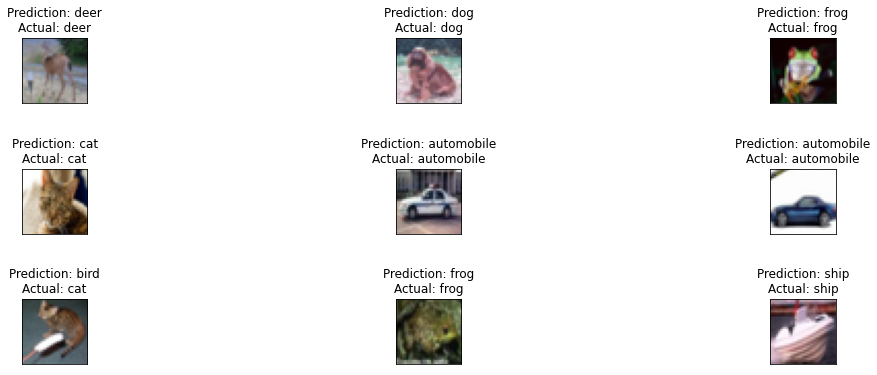

In [12]:
fig, axs = plt.subplots (3, 3, figsize = (19,6))
fig.subplots_adjust (hspace = 1)
axs = axs. flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels [key], class_labels[labels[i]]) 
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False) 
            axs[i].axes.get_yaxis().set_visible(False)

    # plot the image
    axs[i].imshow(img)

# show the plot
plt.show()